### Import Libraries

In [1]:
library(tidyverse)
library(ggplot2)
library(rnaturalearth)
library(rnaturalearthdata)
library(sf)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Linking to GEOS 3.7.2, GDAL 2.4.2, PROJ 5.2.0


### Import Data & Select necessary columns

In [3]:
data <- read_csv("../data/WHO_life_expectancy_data_clean.csv", 
               col_types=cols(X1=col_skip()))

data <- select(data, c("life_expectancy","year","country","gdp"))
data

Warning message:
“Missing column names filled in: 'X1' [1]”

life_expectancy,year,country,gdp
<dbl>,<dbl>,<chr>,<dbl>
65.0,2015,Afghanistan,584.25921
59.9,2014,Afghanistan,612.69651
59.9,2013,Afghanistan,631.74498
59.5,2012,Afghanistan,669.95900
59.2,2011,Afghanistan,63.53723
58.8,2010,Afghanistan,553.32894
58.6,2009,Afghanistan,445.89330
58.1,2008,Afghanistan,373.36112
57.5,2007,Afghanistan,369.83580


In [4]:
# World Map Data                   
world_outline <- ne_countries(scale = "medium", returnclass = "sf")
str(world_outline)

Classes ‘sf’ and 'data.frame':	241 obs. of  64 variables:
 $ scalerank : int  3 1 1 1 1 3 3 1 1 1 ...
 $ featurecla: chr  "Admin-0 country" "Admin-0 country" "Admin-0 country" "Admin-0 country" ...
 $ labelrank : num  5 3 3 6 6 6 6 4 2 6 ...
 $ sovereignt: chr  "Netherlands" "Afghanistan" "Angola" "United Kingdom" ...
 $ sov_a3    : chr  "NL1" "AFG" "AGO" "GB1" ...
 $ adm0_dif  : num  1 0 0 1 0 1 0 0 0 0 ...
 $ level     : num  2 2 2 2 2 2 2 2 2 2 ...
 $ type      : chr  "Country" "Sovereign country" "Sovereign country" "Dependency" ...
 $ admin     : chr  "Aruba" "Afghanistan" "Angola" "Anguilla" ...
 $ adm0_a3   : chr  "ABW" "AFG" "AGO" "AIA" ...
 $ geou_dif  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ geounit   : chr  "Aruba" "Afghanistan" "Angola" "Anguilla" ...
 $ gu_a3     : chr  "ABW" "AFG" "AGO" "AIA" ...
 $ su_dif    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ subunit   : chr  "Aruba" "Afghanistan" "Angola" "Anguilla" ...
 $ su_a3     : chr  "ABW" "AFG" "AGO" "AIA" ...
 $ brk_diff  : num  0 0 0 0

### Data Cleaning & Processing

In [5]:
raw_country_names <- levels(as.factor(data$country))
labels <- levels(as.factor(world_outline$sovereignt))
setdiff(raw_country_names, labels)

[1] "Bahamas"                                             
 [2] "Bolivia (Plurinational State of)"                    
 [3] "Brunei Darussalam"                                   
 [4] "Cabo Verde"                                          
 [5] "Congo"                                               
 [6] "Cook Islands"                                        
 [7] "Côte d'Ivoire"                                       
 [8] "Czechia"                                             
 [9] "Democratic People's Republic of Korea"               
[10] "Guinea-Bissau"                                       
[11] "Iran (Islamic Republic of)"                          
[12] "Lao People's Democratic Republic"                    
[13] "Micronesia (Federated States of)"                    
[14] "Niue"                                                
[15] "Republic of Korea"                                   
[16] "Republic of Moldova"                                 
[17] "Russian Federation"                                  
[18] "Serbia"                                              
[19] "Syrian Arab Republic"                                
[20] "The former Yugoslav republic of Macedonia"           
[21] "Timor-Leste"                                         
[22] "Tuvalu"                                              
[23] "United Kingdom of Great Britain and Northern Ireland"
[24] "Venezuela (Bolivarian Republic of)"                  
[25] "Viet Nam"

In [6]:
# Clean country names 
clean_data <- data %>%
  mutate(country = case_when(country == "Bahamas" ~ "The Bahamas" ,
                             country == "Bolivia (Plurinational State of)" ~ "Bolivia",
                             country == "Brunei Darussalam" ~ "Brunei",
                             country == "Cabo Verde" ~ "Cape Verde",
                             country == "Congo" ~ "Republic of Congo",
                             country == "Côte d'Ivoire" ~ "Ivory Coast" ,
                             country == "Czechia" ~ "Czech Republic",                                             
                             country == "Democratic People's Republic of Korea" ~ "North Korea",
                             country == "Guinea-Bissau" ~ "Guinea Bissau",
                             country == "Iran (Islamic Republic of)" ~ "Iran" ,
                             country == "Lao People's Democratic Republic" ~ "Laos" ,
                             country == "Micronesia (Federated States of)" ~ "Federated States of Micronesia" ,
                             country == "Republic of Korea"  ~ "South Korea" ,                    
                             country == "Republic of Moldova" ~ "Moldova" ,                           
                             country == "Russian Federation" ~ "Russia" ,                            
                             country == "Serbia" ~ "Republic of Serbia"  ,                              
                             country == "Syrian Arab Republic"  ~ "Syria",                               
                             country == "The former Yugoslav republic of Macedonia" ~ "Macedonia",          
                             country == "Timor-Leste"  ~ "East Timor"  ,                          
                             country == "Tuvalu"~ "Samoa",                                           
                             country == "United Kingdom of Great Britain and Northern Ireland" ~ "United Kingdom" ,
                             country == "United Republic of Tanzania" ~ "United Republic of Tanzania",                   
                             country == "Venezuela (Bolivarian Republic of)" ~ "Venezuela" ,            
                             country == "Viet Nam" ~ "Vietnam" ,
                             TRUE ~ country)) %>%
  group_by(country) %>%
  summarise(mean_life_exp = mean(life_expectancy),  # Summarize by Country & Retrieve Mean Values
            mean_gdp = mean(gdp),
            mean_log_gdp = log(mean(gdp)))


In [7]:
data_for_mapping <- left_join(world_outline, clean_data, by=c("sovereignt"="country"))

### Plotting

In [8]:
life_heat_map<- ggplot(data_for_mapping) +
                  geom_sf(size=0.05, aes(fill=mean_life_exp)) +
                  scale_fill_gradient2(low= "#f2ff00", mid= "#00ff2a", high="#1500ff" , midpoint = 65, na.value="white")

    
gdp_heat_map<- ggplot(data_for_mapping) +
                  geom_sf(size=0.05, aes(fill=mean_gdp)) +
                  scale_fill_gradient2(low= "#f2ff00", mid ="#00ff2a", high="#1500ff" , midpoint =25000 , na.value="white")

log_gdp_heat_map <- ggplot(data_for_mapping) +
                      geom_sf(size=0.05, aes(fill=mean_log_gdp)) +
                      scale_fill_gradient2(low= "#f2ff00", mid="#00ff2a", high="#1500ff" , midpoint = 7.5 , na.value="white")


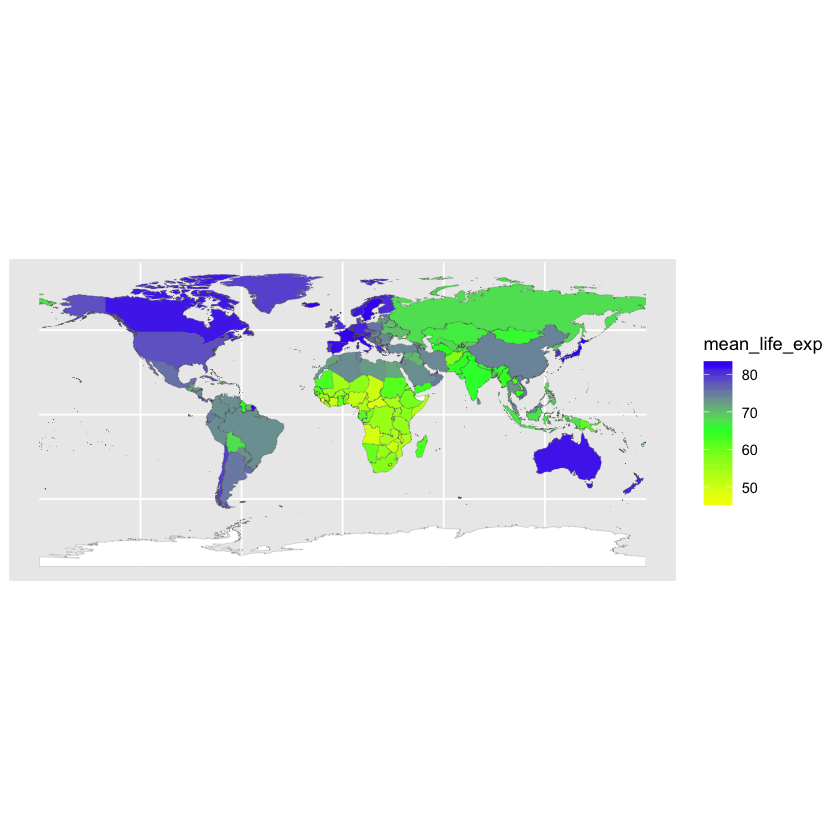

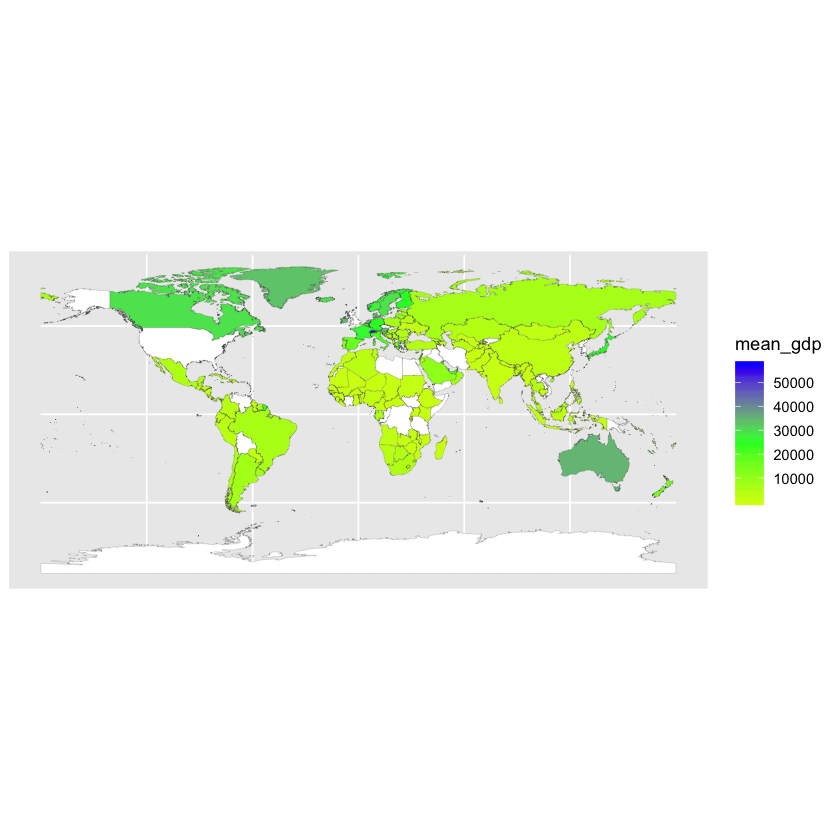

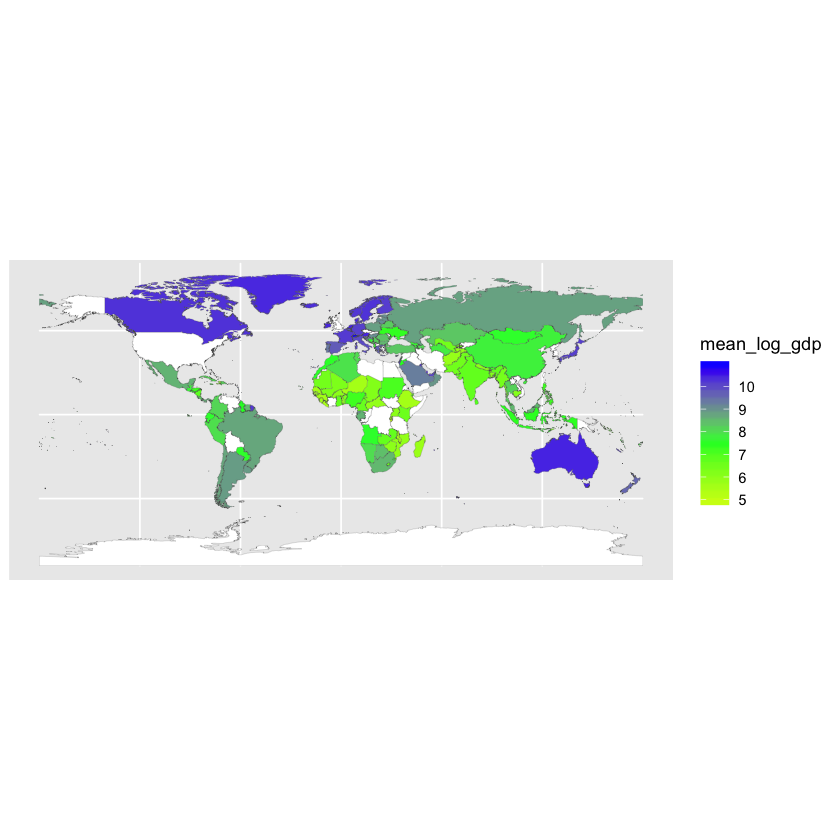

In [9]:
life_heat_map
gdp_heat_map
log_gdp_heat_map